# Support Vector Machine

ML Lab 7

Support vector machine

---



Vemula Ananya

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset
titanic = sns.load_dataset('titanic')

# Selecting relevant features
data = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [ ]:
# Drop rows with missing target values
data.dropna(subset=['survived'], inplace=True)

# Fill missing values in 'age' and 'fare' with median
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Fill missing values in 'embarked' with most common value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])  # Male -> 1, Female -> 0
data['embarked'] = label_encoder.fit_transform(data['embarked'])  # C, Q, S -> Encoded as 0,1,2


<ipython-input-5-babd69c22cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['survived'], inplace=True)
<ipython-input-5-babd69c22cc5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-5-babd69c22cc5>:5: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
# Split dataset into features and target
X = data.drop(columns=['survived'])
y = data['survived']

# Split into training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM is sensitive to scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train models with different kernels
svm_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale').fit(X_train, y_train)
svm_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
svm_logistic = SVC(kernel='sigmoid', C=1.0).fit(X_train, y_train)

In [ ]:
# Get accuracies
accuracy_linear = accuracy_score(y_test, svm_linear.predict(X_test))
accuracy_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))
accuracy_poly = accuracy_score(y_test, svm_poly.predict(X_test))
accuracy_logistic = accuracy_score(y_test, svm_logistic.predict(X_test))

In [ ]:
# Print results
print(f"Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")
print(f"Polynomial Kernel Accuracy: {accuracy_poly:.2f}")
print(f"Logistic Kernel Accuracy: {accuracy_logistic:.2f}")

Linear Kernel Accuracy: 0.78
RBF Kernel Accuracy: 0.82
Polynomial Kernel Accuracy: 0.79
Logistic Kernel Accuracy: 0.69


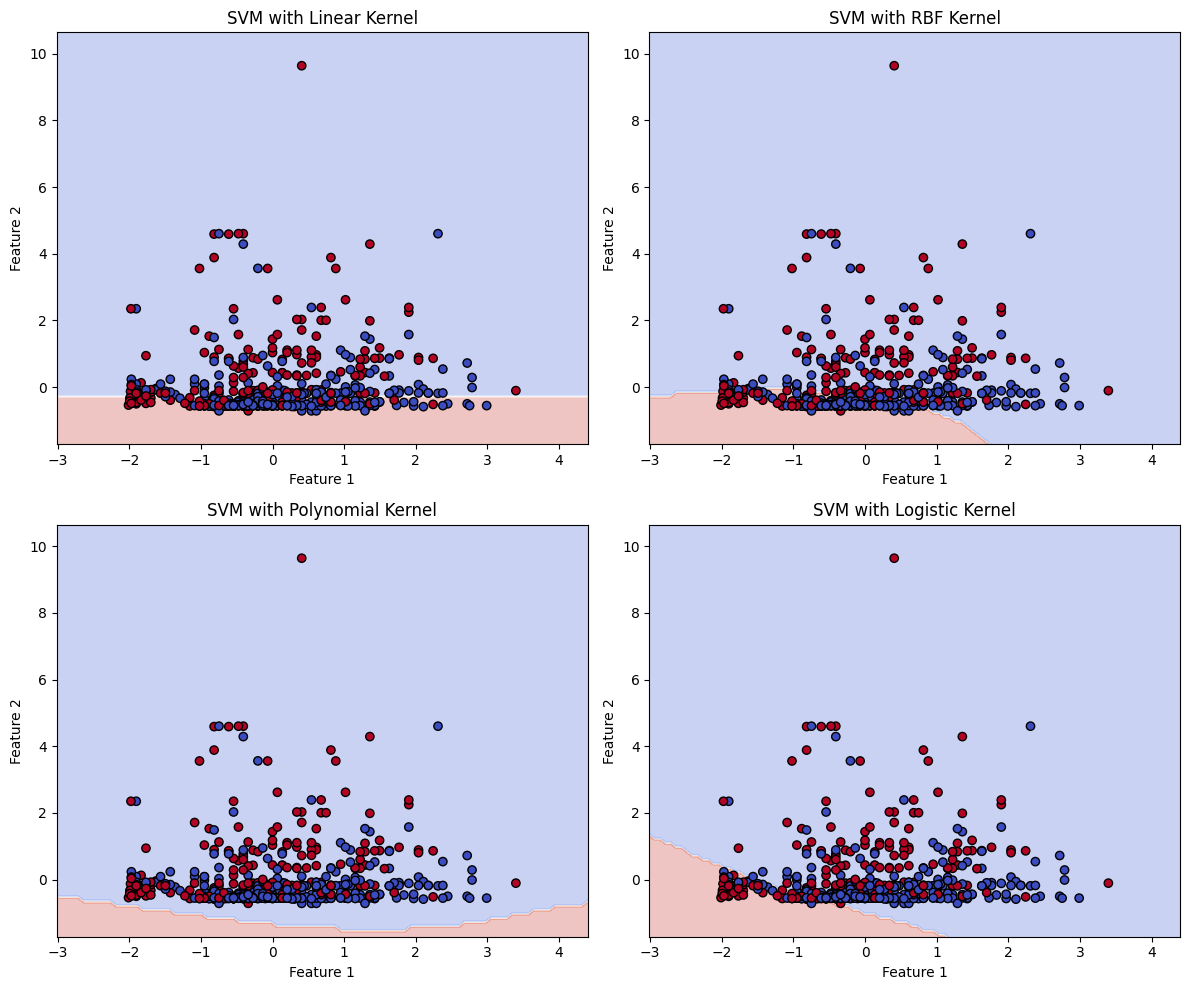

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the first two features from X_train for visualization
X_train_2d = X_train[:, :2]  # Select the first two features

# Create a mesh grid for visualization using the selected features
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


# List of trained models
models = {
    "Linear Kernel": svm_linear,
    "RBF Kernel": svm_rbf,
    "Polynomial Kernel": svm_poly,
    "Logistic Kernel": svm_logistic
}

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (kernel, model) in enumerate(models.items()):
    # Create input data for prediction using the meshgrid and selected features
    X_plot = np.c_[xx.ravel(), yy.ravel()]

    # If the model expects more than 2 features, pad the input data with zeros
    if model.n_features_in_ > 2:
        X_plot = np.pad(X_plot, ((0, 0), (0, model.n_features_in_ - 2)), 'constant', constant_values=0)

    Z = model.predict(X_plot)  # Predict class labels
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
    axes[i].set_title(f'SVM with {kernel}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
